MACHINE LERNING PIPLEINE BY: Okello Isaac Opio

Stuyd title: 

**GENETIC, BIOLOGICAL AND PSYCHOSOCIAL PREDICTORS OF INCIDENT AND PERSISTENT INTERNALIZING MENTAL DISORDERS AMONG UGANDAN CHILDREN AND ADOLESCENTS LIVING WITH HIV: A MACHINE LEARNING APPROACH**

**General Objective**

The general objective of this study is to investigate the predictors of Internalizing Mental Disorders among Ugandan children and adolescents living with HIV using a machine learning approach. 

**Specific Objectives**
- To build a machine learning model for prediction of prevalent, incident, and persistent cases of Internalizing Mental Disorders among Ugandan children and adolescents living with HIV.
- To evaluate the performance of the machine learning model (developed in 1 above) based on each of Genetic, Biological, and Psychosocial factors respectively.
- To evaluate the performance of the machine learning model based on the combination of all the three factor domains of Genetic, Biological, and Psychosocial factors. 


**STEPS**

The project roadmap
1. Prepare Problem
a) Load libraries
b) Load dataset

2. Summarize Data
a) Descriptive statistics
b) Data visualizations

3. Prepare Data
a) Data Cleaning
b) Feature Selection
c) Data Transforms

4. Evaluate Algorithms
a) Split-out validation dataset
b) Test options and evaluation metric
c) Spot Check Algorithms
d) Compare Algorithms

5. Improve Accuracy
a) Algorithm Tuning

6. Finalize Model
a) Predictions on validation dataset
b) Create standalone model on entire training dataset

7. Feature importance selection

In [1]:
# IMD Python Project Pipeline
# Load libraries
#import the necessary libraries

import pandas as pd # For the manipulation of tabular data
import numpy as np # For improved numerical calculation
from ydata_profiling import ProfileReport # For exploratory data analysis reporting
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For improved plot outlook

%matplotlib inline 
#Tells Jupyter to display any matplotlib plots directly within the notebook, rather than in a separate. Alt: plt.show()

# Importing the scaler
from sklearn.preprocessing import StandardScaler

# Importing required models and metrics
# Importing necessary modules for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Importing classifiers based on their functionalities

# Logistic Regression: A linear model for classification tasks, often used for binary classification
from sklearn.linear_model import LogisticRegression  
# Gaussian Naive Bayes: A probabilistic classifier based on Bayes' theorem with Gaussian distribution assumption
from sklearn.naive_bayes import GaussianNB  
# K-Nearest Neighbors: A non-parametric method used for classification based on nearest training examples
from sklearn.neighbors import KNeighborsClassifier  
# Decision Tree: A non-linear model that partitions the feature space into regions to make predictions
from sklearn.tree import DecisionTreeClassifier  
# Support Vector Classifier: A powerful classifier that finds the hyperplane that best separates classes in high-dimensional space
from sklearn.svm import SVC  

# Importing ensemble classifiers
# Random Forest: An ensemble method that builds multiple decision trees and combines their predictions
from sklearn.ensemble import RandomForestClassifier  
# Gradient Boosting Classifier: An ensemble method that builds trees sequentially, each correcting the mistakes of the previous one
from sklearn.ensemble import GradientBoostingClassifier  
# AdaBoost Classifier: An ensemble method that combines multiple weak learners to build a strong classifier
from sklearn.ensemble import AdaBoostClassifier  

# Removing the warnings from the cells by importing the warnings module

import warnings
warnings.filterwarnings('ignore')  # Setting up a filter to ignore warnings. Good if you are confident with the codes

In [2]:
import pandas as pd

# Define columns and their respective data types
dtype_mapping = {
    'Age_Category': str, 'Gender_of_Child': str, 'Childs_Education_Level': str,
    'Religion': str, 'BMI_category': str, 'Tribe_of_Child': str, 'orphanhood': str,
    'Socio_Economic_Status': str, 'Support_Program': str, 'Child_Takes_ART': str,
    'Premature_Birth': str, 'Born_with_HIV': str, 'Stress': str, 'Worst_HIV_Stage': str,
    'CD4_category': str, 'Viralload_Category': str, 'Telomere_Lenth_Difference': float, 'telomere_length_change': str,
    'stin2vntr_': str, 'httlpr1_polymorphism': str, 'HTTLPRrs35531': str,
    'rs35531_polymorphism': str, 'Rs10482605_polymorphism': str,
    'Rs1360780_polymorphism': str, 'rs1386494_polymorphism': str,
    'rs1843809_polymorphism': str, 'rs34517220_polymorphism': str, 'GroupCategory': str,
    'IMDs': str, 'Age': float, 'Baseline_telomere_length': float, 'Telomere_length_12Months': float
}

# Read the CSV file with specified data types
IMD_IMD = pd.read_csv("IMD Incidence CSV Data.csv", dtype=dtype_mapping, encoding='latin1')

# # Display the first few rows of the DataFrame
# IMD_IMD.head(5)


In [3]:
# List variable names
variable_names = IMD_IMD.columns.tolist()

# Print the variable names
print(variable_names)

#Dropping Non-Important and Redundant Variables 
# List of variables to drop

columns_to_drop = ['Age', 'Age_Category', 'Gender_of_Child', 'Childs_Education_Level', 'Religion',
       'BMI_category', 'Tribe_of_Child', 'orphanhood', 'Socio_Economic_Status',
       'Support_Program', 'Child_Takes_ART', 'Premature_Birth',
       'Born_with_HIV', 'Stress','stin2vntr_', 'httlpr1_polymorphism', 'HTTLPRrs35531', 'rs35531_polymorphism', 'Rs10482605_polymorphism', 'Rs1360780_polymorphism', 'rs1386494_polymorphism', 'rs1843809_polymorphism', 'rs34517220_polymorphism', 'GroupCategory',]
# Dropping the specified columns
IMD_Dataset = IMD_IMD.drop(columns=columns_to_drop)

IMD_Dataset.columns

['Age', 'Age_Category', 'Gender_of_Child', 'Childs_Education_Level', 'Religion', 'BMI_category', 'Tribe_of_Child', 'orphanhood', 'Socio_Economic_Status', 'Support_Program', 'Child_Takes_ART', 'Premature_Birth', 'Born_with_HIV', 'Stress', 'Worst_HIV_Stage', 'CD4_category', 'Viralload_Category', 'Baseline_telomere_length', 'Telomere_length_12Months', 'Telomere_Lenth_Difference', 'telomere_length_change', 'stin2vntr_', 'httlpr1_polymorphism', 'HTTLPRrs35531', 'rs35531_polymorphism', 'Rs10482605_polymorphism', 'Rs1360780_polymorphism', 'rs1386494_polymorphism', 'rs1843809_polymorphism', 'rs34517220_polymorphism', 'GroupCategory', 'IMDs']


Index(['Worst_HIV_Stage', 'CD4_category', 'Viralload_Category',
       'Baseline_telomere_length', 'Telomere_length_12Months',
       'Telomere_Lenth_Difference', 'telomere_length_change', 'IMDs'],
      dtype='object')

**Summarize Data**

Descriptive statistics


In [4]:
# 2. Summarize Data
# # a) Descriptive statistics
# IMD_Dataset.dtypes

In [5]:
IMD_Dataset.shape

(368, 8)

In [6]:
IMD_Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Baseline_telomere_length,306.0,1.096681,0.353820,0.019943,0.883237,1.065063,1.325456,2.179359
Telomere_length_12Months,274.0,0.884187,0.274839,0.334023,0.715534,0.836745,0.989858,2.189877
Telomere_Lenth_Difference,234.0,0.234441,0.415458,-1.233903,0.021327,0.192954,0.465857,1.260447


In [7]:
# Checking for duplicates
IMD_Dataset.duplicated().sum()


9

In [8]:
# import matplotlib.pyplot as plt

# # Define colors for the pie chart
# colors = ['#FF5733', '#1F77B4']

# # Proportion of fetal health classes
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.pie(IMD_Dataset['IMDs'].value_counts(), startangle=90, counterclock=False, autopct='%1.1f%%', wedgeprops={'width': 1}, colors=colors)
# plt.axis('equal')  # Set equal aspect ratio to make it a complete circle
# plt.legend(['Have Incident IMD', 'No Incident IMD'])  # Set the legend labels
# plt.title("Prevalence of Incident Internalizing Mental Disorder")  # Set the title
# plt.show()


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Given variable names
# variables_of_interest = ['Baseline_telomere_length', 'Telomere_length_12Months', 'Telomere_Lenth_Difference']

# # Select only the specified variables from the dataset
# selected_variables = IMD_Dataset[variables_of_interest]

# # # Plot histograms for each selected variable
# # for var in selected_variables.columns:
# #     plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
# #     plt.hist(selected_variables[var], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins and color as needed
# #     plt.title(f'Distribution of {var}')
# #     plt.xlabel(var)
# #     plt.ylabel('Frequency')
# #     plt.grid(True)
# #     plt.show()

# # Define colors
# hist_color = 'blue'
# kde_color = 'red'

# # Plot histograms for each selected variable
# for var in selected_variables.columns:
#     plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    
#     # Plot histogram with KDE curve
#     sns.histplot(selected_variables[var], bins=20, color=hist_color, edgecolor='black', kde=True, line_kws={'color': kde_color})
    
#     plt.title(f'Distribution of {var}')
#     plt.xlabel(var)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

In [10]:
# Display the first few rows of the DataFrame
IMD_Dataset.isnull().sum().sum()

485

In [11]:
# IMD_Dataset.isnull().sum().sum

In [12]:
# import pandas_profiling

# # create an EDA report using pandasprofiling
# profile = IMD_Dataset.profile_report()

# # Saving the profile report
# profile.to_file("Incident_May_IMD_Profile_Report.html")

# # Display the profile report
# display(profile)


Observations from pandas profiling
- `General Statistics:` There were about 29 variables. with 368 observations. The missing cells composed of 6.5%. There were no duplicates.
- `Presence of a highly imbalanced variable:` There were over 15 varaibles that were imbalanced and this informed our decision on the metrcs for selcetion of best model

**IMPUTATIONS OF MISISNG VALUES**

- The SimpleImputer was the ebst choice to be used.

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate features and target variable
IMD_2 = IMD_Dataset.copy()
# Identify numerical and categorical (object) columns
# numerical_cols = IMD_2.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = IMD_2.select_dtypes(include=['object']).columns

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(IMD_2[categorical_cols]), columns=categorical_cols)

# Combine imputed numerical and categorical columns
IMD_2_imputed = pd.concat([categorical_imputed], axis=1)

#Check for misisng vlaues again
IMD_2_imputed.isnull().sum().sum()

0

### 3. Prepare Data

a) Data Cleaning

b) Feature Selection

c) Data Transforms



ENCODING

In [14]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features and target variable
IMD_Copy = IMD_2_imputed.copy()

# Label encode the IMD_Copy variable if it's categorical
for column in IMD_Copy.columns:
    if IMD_Copy[column].dtype == 'object' or IMD_Copy[column].dtype.name == 'category':
        label_encoder = LabelEncoder()
        IMD_Copy[column] = label_encoder.fit_transform(IMD_Copy[column])
IMD_Copy.head(5)

,Worst_HIV_Stage,CD4_category,Viralload_Category,telomere_length_change,IMDs
0,1,0,2,0,0
1,0,0,0,0,1
2,1,0,1,0,1
3,1,0,0,0,1
4,1,0,1,1,1


*Droping tldiff*

I had to drop this becuase it failed to imput misisng values, eeven after trying to trasnfom. presence of missing values was affecting model training. 

In [15]:
# Drop the original 'tldiff' column
# IMD_Copy.drop(columns=['tldiff'], inplace=True)


In [16]:
# # create an EDA report using pandasprofiling
# profile2 = IMD_Copy.profile_report()

# #Saving the profile report
# profile2.to_file("Profile_Transformed_Imputed.html")

# # Display the profile report
# display(profile2)

MODEL BUILDING

In [17]:
# Since IMD_Copy contains both features and the target variable
# Separate features and target variable
features = IMD_Copy.drop('IMDs', axis=1)
target = IMD_Copy['IMDs']

In [18]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms



**Model Spot-checking**

The following classifiers have been used in the model spot-checking
- Dummy Classifier - Not Included to check for accuracy given only most frequent class is always predicted as target. Taken as lower baseline classifier.
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbours
- Support Vector Machines - Support Vector Classifier
- Decision Trees
- Ensemble classifiers (Random Forests, Gradient Boosting Classifier and AdaBoostClassifier)

The chosen evaluation metric was `f1-score`. However, other metrics `precision`, `recall`, `roc_auc` were also employed to do model spot checking.

The **`_weighted`** versions of the metrics have been used to cater for `target imbalances` in the data. For `roc_auc`, the **`_ovo` (one versus one (ovo))** was used to cater for `imbalances` in the data too. The ovo is insensitive to data label imbalances unlike the `one versus rest` version.

The `StratifiedKFold` was used in `cross validation` to ensure each `split` contains equivalent proportions of the different `classes` in the data.

At first, the `DummyClassifier` was used to set a `baseline score` given one choses the target value at random or selects the most frequent class.

In [19]:
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiating the models
# dc = DummyClassifier(strategy='most_frequent')
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
sv = SVC(probability=True)  # Probability set to True to return a non-NaN roc_auc
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ad = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()

from sklearn.model_selection import StratifiedKFold

# Setting the StratifiedKFold parameter
skfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# ^ This creates a StratifiedKFold object with 10 splits, ensuring that each fold has approximately the same class distribution as the original dataset.
#   `random_state=42` ensures reproducibility of results, while `shuffle=True` shuffles the data before splitting into folds.

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Define models and scores as you did
models = [lr, nb, knn, dt, sv, rf, gb, ad, lda]
scores = ["f1_weighted", "precision_weighted", "recall_weighted", "accuracy", "roc_auc_ovo_weighted"]

# Initialize lists to store scores for each model
f1 = []
precision = []
recall = []
accuracy = []
roc_auc = []
score_lists = [f1, precision, recall, accuracy, roc_auc]

# Define the number of folds for cross-validation
n_splits = 10  # You can adjust this number as needed

# Split the data into training and testing sets
# Assuming features and target are already defined
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize StratifiedKFold for cross-validation
skfold = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# For loop to evaluate the models
for model in models:
    print(model)
    for index, score in enumerate(scores):
        cv_scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring=score)
        score_lists[index].append(np.mean(cv_scores))
        print(score + " : " + str(np.mean(cv_scores)))
    print("\n")


LogisticRegression()
f1_weighted : 0.5536821003996877
precision_weighted : 0.5210959175584622
recall_weighted : 0.6736781609195402
accuracy : 0.6736781609195402
roc_auc_ovo_weighted : 0.5705570175438596


GaussianNB()
f1_weighted : 0.60009966870188
precision_weighted : 0.6141122861812518
recall_weighted : 0.6564367816091954
accuracy : 0.6564367816091954
roc_auc_ovo_weighted : 0.5571564327485381


KNeighborsClassifier()
f1_weighted : 0.6346185617754039
precision_weighted : 0.6414246294804042
recall_weighted : 0.6668965517241381
accuracy : 0.6668965517241381
roc_auc_ovo_weighted : 0.5775862573099415


DecisionTreeClassifier()
f1_weighted : 0.6254561186404699
precision_weighted : 0.6135589166989416
recall_weighted : 0.6772413793103448
accuracy : 0.6772413793103448
roc_auc_ovo_weighted : 0.5961154970760234


SVC(probability=True)
f1_weighted : 0.5517735816396858
precision_weighted : 0.5191391578430817
recall_weighted : 0.6701149425287356
accuracy : 0.6701149425287356
roc_auc_ovo_weighted :

Logistic regression was chosen as the best model

In [21]:
# Define a dictionary to store mean scores for each model and metric
model_scores = {}

# Populate the dictionary with mean scores for each model and metric
for model, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score in zip(models, f1, precision, recall, accuracy, roc_auc):
    model_scores[model] = {
        "F1 Score": f1_score,
        "Precision": precision_score,
        "Recall": recall_score,
        "Accuracy": accuracy_score,
        "ROC AUC": roc_auc_score
    }

# Sort models based on each metric's score in descending order
sorted_models = {}
for metric in model_scores[model].keys():
    sorted_models[metric] = sorted(model_scores.keys(), key=lambda x: model_scores[x][metric], reverse=True)

# Print models in descending order for each metric
for metric, models in sorted_models.items():
    print(metric)
    for rank, model in enumerate(models, start=1):
        print(f"{rank}. {model}: {model_scores[model][metric]}")
    print()


F1 Score
1. KNeighborsClassifier(): 0.6346185617754039
2. DecisionTreeClassifier(): 0.6254561186404699
3. RandomForestClassifier(): 0.6172408707727488
4. GradientBoostingClassifier(): 0.6089127181457535
5. GaussianNB(): 0.60009966870188
6. LinearDiscriminantAnalysis(): 0.5653224964777737
7. LogisticRegression(): 0.5536821003996877
8. AdaBoostClassifier(): 0.552563948384355
9. SVC(probability=True): 0.5517735816396858

Precision
1. KNeighborsClassifier(): 0.6414246294804042
2. RandomForestClassifier(): 0.6186722260948596
3. GaussianNB(): 0.6141122861812518
4. DecisionTreeClassifier(): 0.6135589166989416
5. GradientBoostingClassifier(): 0.6113753076025389
6. LinearDiscriminantAnalysis(): 0.5678392125776193
7. LogisticRegression(): 0.5210959175584622
8. SVC(probability=True): 0.5191391578430817
9. AdaBoostClassifier(): 0.5151955973299612

Recall
1. RandomForestClassifier(): 0.6908045977011493
2. GradientBoostingClassifier(): 0.6774712643678161
3. DecisionTreeClassifier(): 0.67724137931034

Note:
Accuracy: This metric measures the proportion of correctly classified instances out of all instances. It's suitable when the class distribution is balanced and all classes are equally important.

Precision: Precision measures the proportion of true positive predictions out of all positive predictions. It's useful when the cost of false positives is high.

Recall (Sensitivity): Recall measures the proportion of true positive predictions out of all actual positive instances. It's valuable when the cost of false negatives is high.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is suitable when there's an uneven class distribution.

ROC AUC: Receiver Operating Characteristic Area Under the Curve (ROC AUC) measures the area under the ROC curve, which plots the true positive rate against the false positive rate. It's suitable for binary classification problems, especially when class imbalance exists.

### Improving Accuracy

#### Hyperparameter tuning
Hyperparameter tuning is used to optimize the performance of machine learning models by searching for the best set of hyperparameters. Hyperparameters are settings that are not learned from the data but are set prior to training, such as the regularization strength in logistic regression, the depth of a decision tree, or the number of trees in a random forest.

Hyperparameter tuning is typically performed after selecting a model and before evaluating its performance on unseen data (e.g., a holdout test set). Here's a breakdown of the typical workflow involving hyperparameter tuning:

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the grid of hyperparameters for each model
# param_grid_dc = {}  # DummyClassifier does not have hyperparameters
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_nb = {}  # GaussianNB does not have hyperparameters
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_dt = {'max_depth': [None, 5, 10, 20]}
param_grid_sv = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
param_grid_ad = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
param_grid_lda = {}  # LinearDiscriminantAnalysis does not have hyperparameters

# Define models to tune
models_to_tune = {'Logistic Regression': (lr, param_grid_lr),
                  'Gaussian Naive Bayes': (nb, param_grid_nb),
                  'K-Nearest Neighbors': (knn, param_grid_knn),
                  'Decision Tree': (dt, param_grid_dt),
                  'Support Vector Classifier': (sv, param_grid_sv),
                  'Random Forest': (rf, param_grid_rf),
                  'Gradient Boosting': (gb, param_grid_gb),
                  'AdaBoost': (ad, param_grid_ad),
                  'Linear Discriminant Analysis': (lda, param_grid_lda)}



IF ACCURACY WAS USED TO CHOOSE THE BEST MODEL

Support Vector Classifier: 0.6909195402298851
Random Forest: 0.6909195402298851
Gradient Boosting: 0.6840229885057472
Decision Tree: 0.677471264367816
Linear Discriminant Analysis: 0.6770114942528735
Logistic Regression: 0.6736781609195402
AdaBoost: 0.6735632183908045
K-Nearest Neighbors: 0.6668965517241381
Gaussian Naive Bayes: 0.6564367816091954

Best Model Selected: Support Vector Classifier


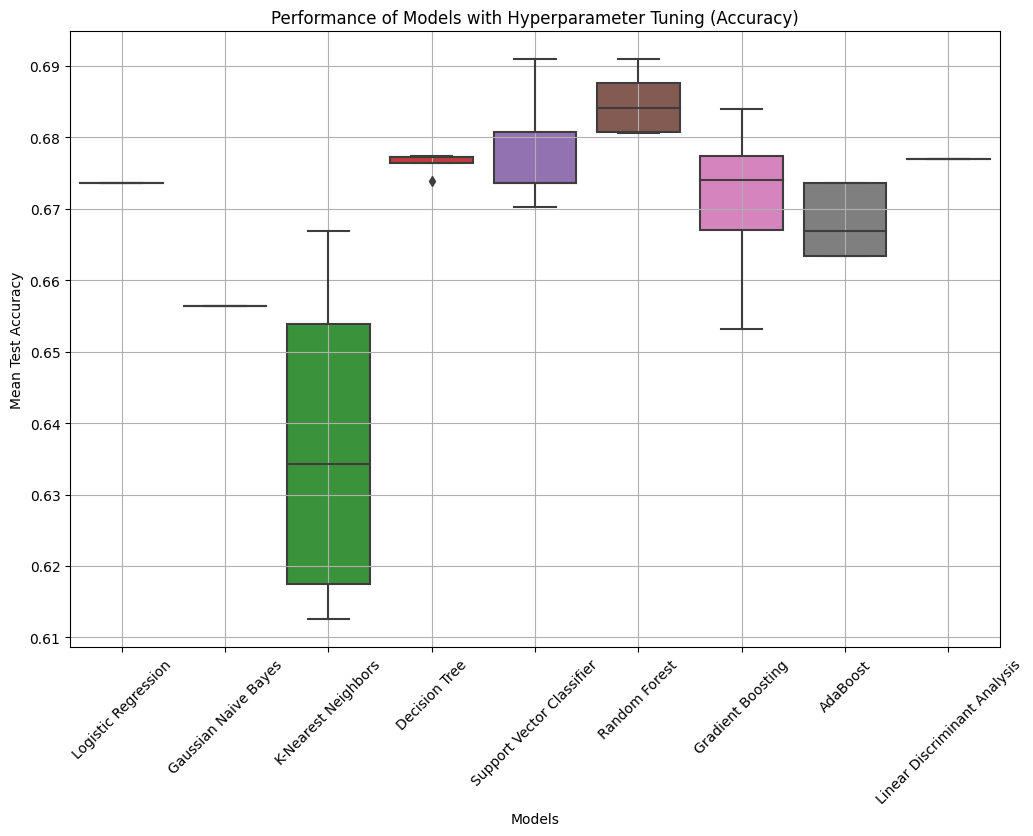

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform grid search for each model
best_models = {}
model_scores = {}

for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    model_scores[name] = grid_search.best_score_
    
# Sort models based on their scores (from best to worst)
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of models with their scores
for name, score in sorted_models:
    print(f"{name}: {score}")

# Select the best model
best_model_name = sorted_models[0][0]
best_model = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# List to store mean test accuracy for each model
mean_test_accuracy = []

# Loop through each model and perform grid search with cross-validation
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    mean_test_accuracy.append(grid_search.cv_results_['mean_test_score'])

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=mean_test_accuracy)
plt.title('Performance of Models with Hyperparameter Tuning (Accuracy)')
plt.xlabel('Models')
plt.ylabel('Mean Test Accuracy')
plt.xticks(range(len(models_to_tune)), models_to_tune.keys(), rotation=45)
plt.grid(True)
plt.show()

IF F1 SCORE WAS USED TO CHOOSE THE BEST MODEL

Support Vector Classifier: 0.805268245806438
Logistic Regression: 0.8048639455782313
AdaBoost: 0.8048639455782313
Linear Discriminant Analysis: 0.8040114343609785
Random Forest: 0.8001547193317379
Gradient Boosting: 0.797107243792207
Decision Tree: 0.7924638849952406
Gaussian Naive Bayes: 0.7764572976442068
K-Nearest Neighbors: 0.7733212286400154

Best Model Selected: Support Vector Classifier


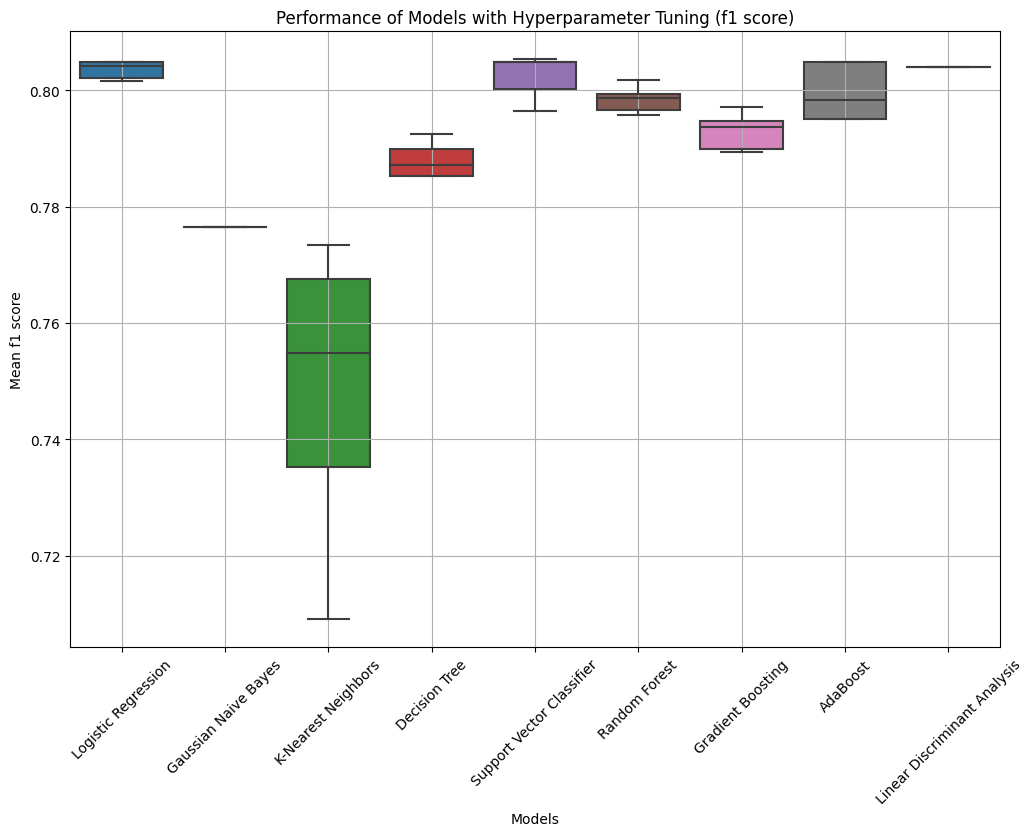

In [24]:
# Perform grid search for each model
best_models = {}
model_scores = {}

for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    model_scores[name] = grid_search.best_score_
    
# Sort models based on their scores (from best to worst)
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of models with their scores
for name, score in sorted_models:
    print(f"{name}: {score}")

# Select the best model
best_model_name = sorted_models[0][0]
best_model_f1 = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# List to store mean f1 score for each model
mean_test_f1 = []

# Loop through each model and perform grid search with cross-validation
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='f1')
    grid_search.fit(X_train, y_train)
    mean_test_f1.append(grid_search.cv_results_['mean_test_score'])

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=mean_test_f1)
plt.title('Performance of Models with Hyperparameter Tuning (f1 score)')
plt.xlabel('Models')
plt.ylabel('Mean f1 score')
plt.xticks(range(len(models_to_tune)), models_to_tune.keys(), rotation=45)
plt.grid(True)
plt.show()

Alternative method to Improving Performnace is Ensemble methods 
Ensemble methods are techniques that combine multiple individual models to improve the overall predictive performance compared to any single model. They work by leveraging the wisdom of the crowd, where the collective decision of multiple models tends to be more accurate and robust than the decision of any individual model. Some popular ensemble methods for improving accuracy include:

Bagging (Bootstrap Aggregating):

Random Forest: Constructs multiple decision trees during training and outputs the mode of the classes as the prediction (classification) or average prediction (regression) of the individual trees.
Bagged Decision Trees: Similar to Random Forest but typically with decision trees as base learners.
Boosting:

AdaBoost (Adaptive Boosting): Iteratively trains weak classifiers (e.g., shallow decision trees) on different subsets of the training data, giving more weight to misclassified samples in subsequent iterations.
Gradient Boosting Machines (GBM): Builds an ensemble of trees sequentially, where each new tree corrects the errors made by the previous ones by fitting residuals.
Stacking (Stacked Generalization):

Stacked Ensemble: Combines the predictions of multiple models (base learners) using a meta-model (often logistic regression or another model) that learns how to best combine the predictions.
Voting:

Voting Classifier: Combines the predictions of multiple base classifiers (e.g., decision trees, SVMs, logistic regression) and predicts the class with the most votes (hard voting) or the class with the highest average probability (soft voting).
Bayesian Model Averaging (BMA):

Bayesian Voting: Instead of using equal weights for all models, assigns different weights to models based on their performance on validation data.

In [25]:
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

PERFROMANCE ON TEST DATA

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# # Split the test data into training and validation sets
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Make predictions on the validation dataset
y_pred_validation = best_model_f1.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_validation)
precision = precision_score(y_test, y_pred_validation, average='weighted')
recall = recall_score(y_test, y_pred_validation, average='weighted')
f1 = f1_score(y_test, y_pred_validation, average='weighted')

# Print evaluation metrics
print(f"Accuracy on test dataset: {accuracy}")
print(f"Precision on test dataset: {precision}")
print(f"Recall on test dataset: {recall}")
print(f"F1-score on test dataset: {f1}")


Accuracy on test dataset: 0.5540540540540541
Precision on test dataset: 0.45730958230958235
Recall on test dataset: 0.5540540540540541
F1-score on test dataset: 0.46968590211833455


FROM ORIGINAL DATA

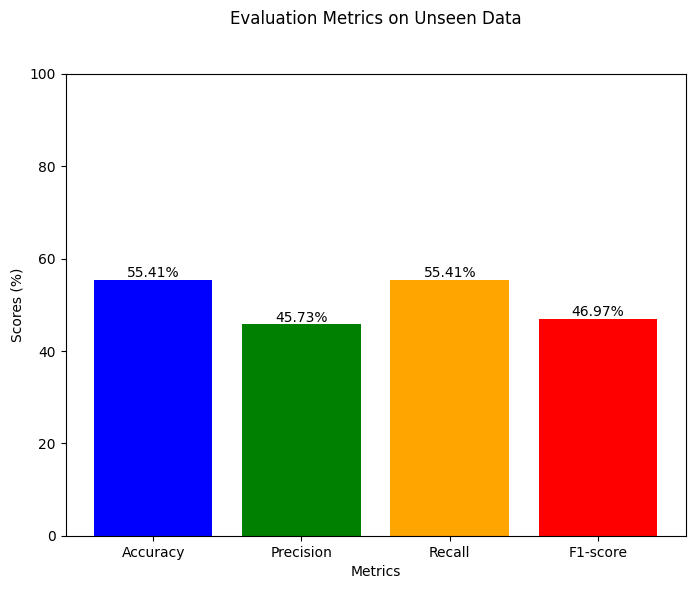

In [27]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Multiply scores by 100 to convert to percentage
scores_percentage = [score * 100 for score in scores]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores_percentage, color=['blue', 'green', 'orange', 'red'])

# Add more space between the chart title and the bar graph
plt.title('Evaluation Metrics on Unseen Data\n\n')

plt.xlabel('Metrics')
plt.ylabel('Scores (%)')  # Adjust y-axis label to indicate percentage
plt.ylim(0, 100)  # Set y-axis limit to range between 0 and 100 for percentages

# Add value labels on top of the bars
for bar, score in zip(bars, scores_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}%'.format(score),
             ha='center', va='bottom')

plt.show()


### FEATURE IMPORTANCE 


Feature importance is a technique used to understand which features have the most impact on a model's predictions. It helps in feature selection, model interpretation, identifying data quality issues, and gaining business insights.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(model, features):
    """
    Plot feature importances for the given model.
    
    Parameters:
        model (object): The trained model for which feature importances are to be plotted.
        features (DataFrame): DataFrame containing the features used for training.
    """
    # Check if the model supports feature importances
    if hasattr(model, 'feature_importances_'):
        # Get feature importances
        feature_importances = model.feature_importances_
        
        # Assuming your features are stored in a DataFrame 'features' with column names
        feature_names = features.columns
        
        # Create a DataFrame to display feature importances
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        
        # Sort the DataFrame by importance in descending order
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        # Print or visualize the feature importances
        print("Feature Importances:")
        print(feature_importance_df)

                # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print("Feature importances are not available for this model.")

# Assuming 'best_model' is the trained model and 'features' is the DataFrame containing features
plot_feature_importances(best_model_f1, features)

Feature importances are not available for this model.


In [29]:
import shap

# Get feature names
feature_names = X_train.columns

# Create a SHAP explainer for the best model
explainer = shap.Explainer(best_model_f1.predict_proba, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot SHAP values
shap.plots.bar(shap_values, max_display=len(feature_names))


ExactExplainer explainer: 75it [00:22,  3.30it/s]                        


IndexError: list index out of range